In [1]:
# Xiaopu Peng

In [1]:
# check whats in the root folder
from subprocess import check_output
print(check_output(['ls', './']).decode('utf8'))

FileNotFoundError: [WinError 2] The system cannot find the file specified

# Imports

In [1]:
import sys
### for Mac
# sys.path.insert(0, '/Users/xiaopupeng/dropbox/workspace/cqsim-redux/')
### for PC
sys.path.insert(0, 'C:/Users/xiaopu/Dropbox/Workspace/CQSim-REDUX/')
import random

# import Methods as mt
import srcREDUX.REDUX.DataIO as dataIO
import srcREDUX.REDUX.Update as update
import srcREDUX.REDUX.Predict_Smooth as predict_smooth
import srcREDUX.REDUX.Results as results
import srcREDUX.ReduxSim as ReduxSim

import numpy as np
import pandas as pd
# %matplotlib inline
%matplotlib notebook
# %matplotlib widget
import matplotlib.pyplot as plt
# import Redux as rd
plt.style.use('ggplot')
# plt.style.use('default')

In [2]:
### For Mac
# path_main='/Users/xiaopupeng/dropbox/workspace/cqsim-redux/'
### for PC
path_main='C:/Users/xiaopu/Dropbox/Workspace/CQSim-REDUX/'
path_data=path_main+'data/'
redux_src=path_main+'srcREDUX/'
cqsim_src=path_main+'srcCQSim/'
sys.path.append(path_main)

## Initialize

In [3]:
def initRE():
    inputRE = {
    # ### CONSTANT ###
    # ratio of stats count when start the arithmetic average estimate
    'scaleRatio': 0.001,
    # ability of ups devise, could be more sophisticated in future (kWh)
    'upsCapability': 500,
    # the workload processing capability of data center (in processors)
    # 'dataCenterCap': 2500,
    'nodNum': 1152,
    'procPerNode': 8,
    # ups and renewable energy price ($)
    'upsPrice': 0.02,
    'solarPrice': 0.09,
    'windPrice': 0.15,
    # ### INITIALIZE ###
    # the initialized threshold of grid price ($)
    'initGridpriceThreshold': 1.0,
    # initialized high and low ratio of current workload for workload shaving
    'initCurWorkloadRatio': 0.2,
    # initialized stable renewable supply level
    'initStableRenSupply': 500,
    ### config of names ###
    'path_in': path_data+'InputREDUX/',
    'path_out': path_data+'REDUXResults/',
    }
    return inputRE

inputRE=initRE()

In [4]:
### REDUX modules ###
print(".................... Data Input")
input_module = dataIO.DataIO(inputPara = inputRE)
input_module.loadData()
inputRE['dataSize'] = input_module.data_size
print('data size:', inputRE['dataSize'])

print(".................... Update")
update_module = update.Update(inputPara=inputRE)

print(".................... Predict&Smooth")
predict_smooth_module = predict_smooth.Predict_Smooth(inputRE, update_module)

print(".................... Smooth")
results_module = results.Results()

.................... Data Input
data size: 2568
.................... Update
.................... Predict&Smooth
.................... Smooth


In [5]:
%whos
# dir()
# globals()
# locals()

Variable                Type              Data/Info
---------------------------------------------------
ReduxSim                module            <module 'srcREDUX.ReduxSi<...>\\srcREDUX\\ReduxSim.py'>
cqsim_src               str               C:/Users/xiaopu/Dropbox/W<...>ace/CQSim-REDUX/srcCQSim/
dataIO                  module            <module 'srcREDUX.REDUX.D<...>REDUX\\REDUX\\DataIO.py'>
initRE                  function          <function initRE at 0x00000216F8E29550>
inputRE                 dict              n=13
input_module            DataIO            <srcREDUX.REDUX.DataIO.Da<...>ct at 0x00000216F8E381F0>
np                      module            <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
path_data               str               C:/Users/xiaopu/Dropbox/W<...>rkspace/CQSim-REDUX/data/
path_main               str               C:/Users/xiaopu/Dropbox/Workspace/CQSim-REDUX/
pd                      module            <module 'pandas' from 'C:<...>es\\pandas\\__init

## Dataset

In [6]:
gridpriceData = input_module.gridprice
solarSupplyData = input_module.solar
windSupplyData = input_module.wind
renSupplyData = input_module.renew

In [7]:
gridpriceStat = []
gridpriceThreshold = []
dataSize = len(gridpriceData)
for i in range(dataSize):
    gridpriceStat.append(gridpriceData[i])
    if len(gridpriceStat) >= dataSize * inputRE['scaleRatio']:
        threshold = np.average(gridpriceStat) * 0.666
#         threshold = np.average(gridpriceStat)
    else:
        threshold = gridpriceData[i]
    gridpriceThreshold.append(threshold)
print(gridpriceThreshold)

[0.5487, 0.5099, 0.34367820000000004, 0.33598035000000004, 0.33197436, 0.3300696, 0.3352263428571429, 0.346428225, 0.35899620000000004, 0.37194768000000006, 0.38449390909090914, 0.39452175, 0.4124025692307693, 0.4283616857142858, 0.44206860000000014, 0.45403301250000005, 0.4643391176470589, 0.47336320000000004, 0.479888052631579, 0.48503448000000005, 0.48557425714285724, 0.48576829090909096, 0.48306717391304355, 0.47929245, 0.47391228, 0.46830046153846155, 0.462278, 0.45660484285714287, 0.45152962758620696, 0.4465885200000001, 0.44423489032258073, 0.443431125, 0.4429808181818181, 0.44355404117647057, 0.44486326285714284, 0.44585739999999996, 0.44945099999999993, 0.45328661052631575, 0.45699724615384607, 0.460354185, 0.4636610780487805, 0.4664204142857143, 0.4682661488372093, 0.46973131363636367, 0.46974904, 0.4691072347826087, 0.46794718723404255, 0.46596273749999995, 0.4628604857142857, 0.459611928, 0.45602717647058816, 0.452452223076923, 0.4489129018867924, 0.44542943333333324, 0.442

<IPython.core.display.Javascript object>


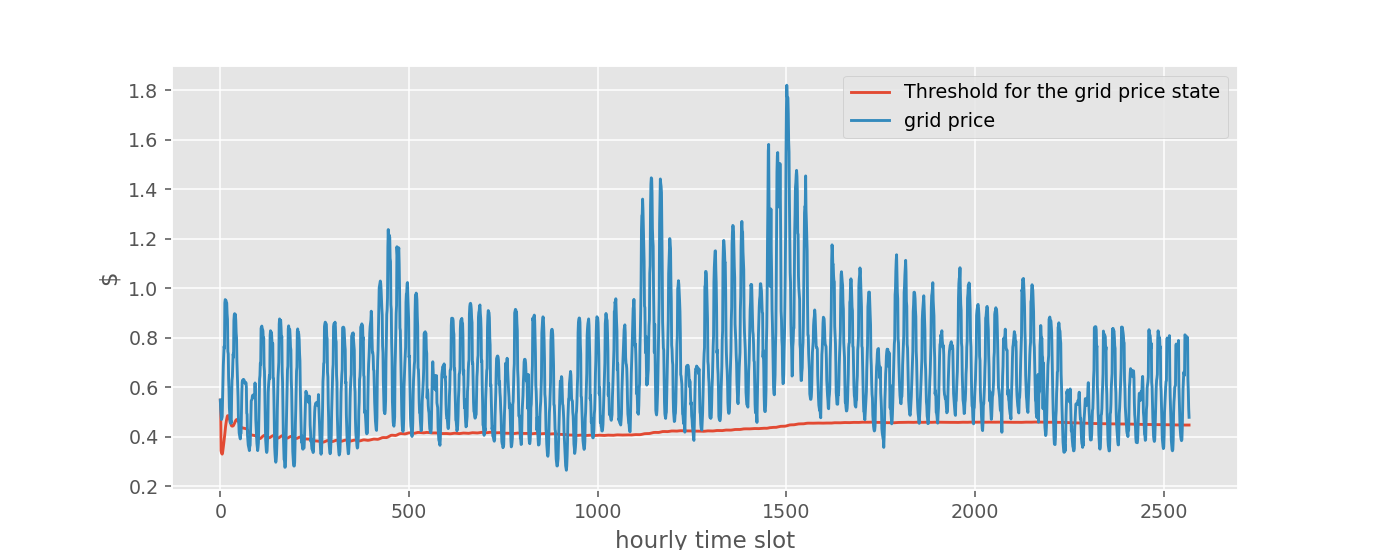

In [10]:
plt.close()
plt.figure(figsize=(10, 4))
plt.plot(gridpriceThreshold, label='Threshold for the grid price state')
plt.plot(gridpriceData, label='grid price')
plt.legend(loc='best')
plt.ylabel('$')
plt.xlabel('hourly time slot')
plt.show()

## Preprocess (need solar&wind model)

### Renewable Energy Regions

In [6]:
WINDOW = 2568 * scaleRatio
smoothedRenSupply = pd.Series(renSupplyData).ewm(span=WINDOW).mean()
# smoothedRenSupply = pd.Series(renSupplyData).ewm(span=WINDOW, min_periods=10).mean()

In [7]:
renSupplyExample = renSupplyData[1100:1125]
print(renSupplyExample)
renSupplyExample[19] = 710
renSupplyExample[5] = 110
renSupplyExample[6] = 90
print(renSupplyExample)
# for i in renSupplyExample:


[134. 193. 199. 218.  43. 267. 249.  23. 190. 155. 418. 623. 584. 785.
 817. 850. 953. 840. 834. 432. 804. 604. 410. 247.  92.]
[134. 193. 199. 218.  43. 110.  90.  23. 190. 155. 418. 623. 584. 785.
 817. 850. 953. 840. 834. 710. 804. 604. 410. 247.  92.]


In [8]:
renExample = np.repeat(renSupplyExample,2)
for i in range(len(renExample)):
    if i % 2 == 0:
        renExample[i] = renExample[i] + 15
    if i % 4 == 0:
        renExample[i] = renExample[i] - 20
    if i % 8 == 0:
        renExample[i] = renExample[i] + 40
    if i % 16 == 0:
        renExample[i] = renExample[i] - 50
renExample[10] = 250
renExample[25] = 500

In [9]:
outage = []
stable = []
for i in range(len(renExample)):
    if renExample[i] < 70:
        outage.append(i)
    if renExample[i] > 900:
        stable.append(i)
print(outage, stable)
outageExample = np.zeros(50)
for i in outage:
    outageExample[i] = renExample[i]
for i in range(len(renExample)):
    if outageExample[i] < 1:
        outageExample[i] = np.nan
stableExample = np.zeros(50)       
for i in stable:
    stableExample[i] = renExample[i]
for i in range(len(renExample)):
    if stableExample[i] < 1:
        stableExample[i] = np.nan
stableExample

[9, 14, 15] [32, 33]


array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, 938.,
       953.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan])

In [10]:
stableExample2 = np.zeros(50)
for i in range(2,8):
    stableExample2[i] = 205
for i in range(26,32):
    stableExample2[i] = 825
for i in range(34,42):
    stableExample2[i] = 770
print(stableExample2)
for i in range(len(stableExample2)):
    if stableExample2[i] < 1:
        stableExample2[i] = np.nan

stableExample2

[  0.   0. 205. 205. 205. 205. 205. 205.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 825. 825.
 825. 825. 825. 825.   0.   0. 770. 770. 770. 770. 770. 770. 770. 770.
   0.   0.   0.   0.   0.   0.   0.   0.]


array([ nan,  nan, 205., 205., 205., 205., 205., 205.,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan, 825., 825., 825., 825., 825., 825.,  nan,
        nan, 770., 770., 770., 770., 770., 770., 770., 770.,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan])

<IPython.core.display.Javascript object>


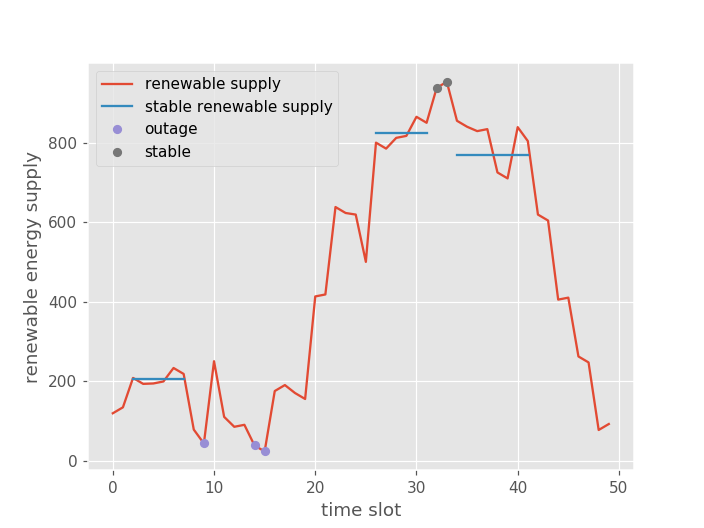

In [11]:
plt.close()
plt.plot(renExample, label='renewable supply')
plt.plot(stableExample2, label='stable renewable supply')
plt.plot(outageExample, 'o', markersize = 5, label='outage')
plt.plot(stableExample, 'o', markersize = 5, label='stable')
# plt.plot(stableExample, 'o', color = 'b', markersize = 2, label='stable renewable supply')
plt.xlabel("time slot")
plt.ylabel("renewable energy supply")
plt.legend(loc='best')
plt.show()


In [12]:
# plt.savefig('renewableStates.eps')
plt.close

<function matplotlib.pyplot.close(fig=None)>

# topLevel

In [13]:
gridpriceThreshold = initGridpriceThreshold
workloadPool = initWorkloadPool
curWorkloadRatio = initCurWorkloadRatio
stableRenSupply = initStableRenSupply
upsStorage = initUpsStorage

curTime = 0
finTime = 2568  # number of timeslots
WINDOW = finTime * scaleRatio

while curTime < finTime:
    # print('current time:', curTime)

    # derive renewable price by weighted average from wind and solar price
    renPrice = (windSupplyData[curTime] * windPrice + solarSupplyData[curTime] * solarPrice) / (windSupplyData[curTime] + solarSupplyData[curTime])

    # get the current grid price, append to grid price statistic and decide whether it is high or low
    
    gridPrice = gridpriceData[curTime]
    
    gridpriceStat.append(gridPrice)
    # call method to estimate grid price state
    gridpriceThreshold, gridpriceState = mt.estimateGridPriceState(gridpriceStat, gridpriceThreshold, finTime, gridPrice, scaleRatio)

    # get the current workload and append to workload statistic, use real trace data for the next step
    curWorkload = workloadData[curTime]

    # first, do workload shaving to avoid over-capability load
    curWorkload, workloadPool = mt.workloadShaving(curWorkload, workloadCapability, workloadPool)
    workloadStat.append(curWorkload)
    
    # get the current workload and append to workload statistic
    renSupply = renSupplyData[curTime]
    renSupplyStat.append(renSupply)
    
    # calculate greenswitchCost (noRedux, but with renewable energy)
#     greenswitchCost = mt.calculateGreenswitchCost(renSupply, curWorkload, workloadPool, gridPrice, renPrice)
#     greenswitchStat.append(greenswitchCost)
#     greenswitchAccu.append(sum(greenswitchStat))

    # then smoothing the current workload by exponential windowed avarage
    curWorkload, workloadPool = mt.workloadSmoothing(curWorkload, workloadPool, workloadStat, WINDOW)

    # update the high and low ratio of workload according to smoothed workload, will approach to 0.8 and 0.2 as when more workload recorded
    curWorkloadHighRatio, curWorkloadLowRatio = mt.updateWorkloadRatio(workloadStat, finTime, curWorkloadRatio, scaleRatio)

    workloadState = mt.updateWorkloadState(curWorkload, curWorkloadHighRatio, curWorkloadLowRatio, workloadCapability)

    # decide utilization level of ups for current time spot
    upsAbility = mt.updateUpsUtilityLevel(workloadState, upsCapability)

    ############################################
    # define renewable state
    # we need to figure out how to define fluctuate and tell why we still use grid as
    # much as possible when grid price is low(by always set a low price), otherwise we lost our motivation
    renState = mt.defineRenState(renSupply, renSupplyStat, renSupplyData, WINDOW)
    ##############################################

    # smoothing supply and demand if necessary
    if renState == 'fluctuate':
        # record the fluctuating renewable supply
        fluRenSupplyStat.append(renSupply)
        # update the stable renewable supply level by historical fluctuate renewable supply stat
        stableRenSupply = mt.getStableRenSupply(fluRenSupplyStat, WINDOW)
        # conduct renewable energy supply
        renSupply, upsStorage, stableGridSupply, upsSupplyFlu = mt.renSupplySmooth(gridpriceState, gridPrice, renSupply, renPrice, stableRenSupply, upsAbility, upsStorage)
    else:
        upsSupplyFlu = 0
        stableGridSupply = 0

    # dynamically decide overpeak workload level
    workloadOVR = mt.updateOverpeak(gridpriceState, curWorkloadHighRatio, curWorkloadLowRatio, workloadCapability, workloadPool, renState, renSupply, stableRenSupply, gridPrice, renPrice)

    # status['workloadState'] == 'overPeak'
    curWorkload, workloadPool = mt.workloadShaving(curWorkload, workloadOVR, workloadPool)

    # decide whether discharge or recharge UPS
    upsSupply, upsStorage = mt.updateUpsSupply(gridpriceState, curWorkload, workloadOVR, renState, upsStorage, upsCapability, upsSupplyFlu)

    # waste renSupply if it is higher than curWorkload
    if renSupply + upsSupply > curWorkload:
        renSupply = curWorkload - upsSupply

    # find gridSupply by supply constrain
    gridSupply = curWorkload - renSupply - upsSupply + stableGridSupply

    # calculate redux cost
    reduxCost = gridPrice * gridSupply + renPrice * renSupply + upsPrice * abs(upsSupply)

    reduxStat.append(reduxCost)
    reduxAccu.append(sum(reduxStat))

    curTime += 1

print('Finished')

Finished


In [14]:
plt.plot(reduxAccu, label='REDUX')
plt.xlabel('hourly time slot')
plt.ylabel('dollars')
plt.title('Accumulative total cost compare of ReUPS')
plt.legend(loc='best')
plt.show()

In [ ]:
# plt.savefig('compare.eps')
plt.close()

In [ ]:
# How to plot 3 graphs together
# for i, col, in enumerate(features.columns):
#     plt.subplot(1, 3, i+1)
#     x = data[col]
#     y = prices
#     plt.plot(x,y,'o')
#     plt.plot(np.unique(x), npplot1d(np.plotfit(x,y,1))(np.unique(x)))
#     plt.title(col)
#     plt.xlabel(col)
#     plt.ylable('prices')